In [29]:

import sys
sys.path.append("../..")  
from langagent.eval import load_jsonl
from langagent.langreason.common import eval_output
import re
from langagent.metrics import get_inference_cost_metrics
def extract_answer(text):
    test_pattern = r'.*?([$.0-9,\-]+)(?:\..*)?'

    matches = re.findall(test_pattern, text)
    if len(matches) >0:
        answer  = matches[-1].rstrip('.') 
        # match = re.match(test_pattern, text, re.DOTALL)
        # answer = match[1] 
    else:
        answer = ''
    return answer

def str_to_num(text):
    try:
        text = int(text)
        return text
    except ValueError:
        pass
    try:
        text = float(text)
        return text
    except ValueError:
        pass
    return None #raise Exception(f"The text {text} cannot be transformed to a number.")

def extract_from_answer_to_metrics(answer_to_metrics):
    new_answer_to_metrics = {}
    for a, v in answer_to_metrics.items():
        k = extract_answer(a)
        k =str_to_num(k)
        if k is not None:
            if k not in new_answer_to_metrics:
                new_answer_to_metrics[k] = v
            else:
                new_answer_to_metrics[k] += v
        else: 
            continue
    return new_answer_to_metrics

def check_correct(result, idx=None):
    new_vote_answers = extract_from_answer_to_metrics(result['answer_vote'])
    new_answer_reward = extract_from_answer_to_metrics(result['answer_reward'])
    
    if len(new_answer_reward) !=0:
        answer_to_reward = {answer: new_answer_reward[answer] for answer, votes in new_vote_answers.items() if votes == max(new_vote_answers.values())}
        answer_pred = max(answer_to_reward, key=lambda answer: sum([r for r in answer_to_reward[answer] if r>=0]))
    else:
        answer_pred = ""
    if eval_output(result['truth'], str(answer_pred)):
        return True
    else:
        if idx is not None:
            print(f"Question {idx} ({result['truth']} / {answer_pred}): ", new_vote_answers, new_answer_reward)
        # print("Truth: ", result['truth'], "; Pred: ", )
    return False

# root_dir = "Qwen3-32B-AWQ_results/math500_bfs_continuous_bne/run_v0.1.3/"
# root_dir = "Qwen3-32B-AWQ_results/math500_bfs/nAct3_depth10_Term1008/run_v0.1.2/"
# root_dir = "Qwen3-32B-AWQ_results/gsm8k_bfs/run_v0.1.2/"
# root_dir = "Qwen3-32B-AWQ_results/gsm8k_bfs_continuous_bns/"
# root_dir = "Qwen3-32B-AWQ_results/math500_bfs_continuous_bns/"

# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bnd/run_v0.1.3/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs/run_a100_v0.1.3/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bnd/run_a100_v0.1.3_qwen_bn/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bns/run_v0.1.6/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bns/run_v0.1.6_bn_qwen/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_a100_v0.1.4long/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs/run_a100_v0.1.6/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_a100_v0.1.4/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_v0.1.4_qwen_bn/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bns/run_v0.1.6/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bns/run_v0.1.6_bn_qwen/"
# filepath = root_dir + "resultdicttojsonl.jsonl"

# results = load_jsonl(filepath)

### Inference Cost

In [ ]:

include_idx=range(100)
inference_logger, metrics = get_inference_cost_metrics(root_dir, include_idx=include_idx, return_metrics=['num_calls', 'input_tokens', 'output_tokens', 'total_hours'], exclude_roles_prefix=["dynamics"])     #  include_idx=list(range(50))
print("Total: ", metrics)
print(len(results))
print(sum([check_correct(result, i) for i, result in enumerate(results)])/len(results))



Result file Meta-Llama-3-8B-Instruct_results/math500_bfs/run_a100_v0.1.6/inferencelogger.log already exists. I will append to it. 
Efficiency metrics - Roles
default :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
dynamics :  {'num_calls': '25980', 'input_tokens': '16.49M', 'output_tokens': '51962', 'total_hours': '7.593331387572818'}
policy :  {'num_calls': '2660', 'input_tokens': '1.35M', 'output_tokens': '515916', 'total_hours': '4.80626869989766'}
evaluator :  {'num_calls': '17952', 'input_tokens': '10.95M', 'output_tokens': '1.28M', 'total_hours': '10.619205300940408'}
bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
Total:  {'num_calls': 20612, 'input_tokens': 12301976, 'output_tokens': 1799772, 'total_hours': 15.43}
100
Question 2 (27 / 64):  {64: 3, 216: 2, 27: 2} {64: [0.47586674690246583, 0.0, 0.

## LlaMa 

In [ ]:

# Inference Cost on GSM8K (Llama on A100)

# CoT:
# policy :   {'num_calls': 100, 'num_batch_calls': 0, 'num_flatten_calls': 0, 'input_tokens': 20476, 'output_tokens': 20041, 'running_time': 569.7622604370117, 'total_hours': 0.15826729456583657}
# Accuracy: 0.73

# ToT-BS : 
# dynamics :  {'num_calls': '14730', 'input_tokens': '6.27M', 'output_tokens': '29462', 'total_hours': '3.593579325609737'}
# policy :  {'num_calls': '1509', 'input_tokens': '544827', 'output_tokens': '108629', 'total_hours': '0.893761372036404'}
# evaluator :  {'num_calls': '13205', 'input_tokens': '5.66M', 'output_tokens': '732989', 'total_hours': '6.015044318702486'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 14714, 'input_tokens': 6207577, 'output_tokens': 841618, 'total_hours': 6.91}
# Accuracy: 0.79

# +BN-SC
# dynamics :  {'num_calls': '10410', 'input_tokens': '5.13M', 'output_tokens': '20821', 'total_hours': '2.829180762635337'}
# policy :  {'num_calls': '1771', 'input_tokens': '753092', 'output_tokens': '124751', 'total_hours': '1.0104808378219605'}
# evaluator :  {'num_calls': '6285', 'input_tokens': '3.29M', 'output_tokens': '342705', 'total_hours': '2.7660994235012266'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '8370', 'input_tokens': '2.07M', 'output_tokens': '204633', 'total_hours': '1.642614470852746'}
# Total:  {'num_calls': 16426, 'input_tokens': 6111730, 'output_tokens': 672089, 'total_hours': 5.42}
# Accuracy: 0.71

# +BN-SC2
# dynamics :  {'num_calls': '4740', 'input_tokens': '2.65M', 'output_tokens': '9480', 'total_hours': '1.3327111350827747'}
# policy :  {'num_calls': '1171', 'input_tokens': '552333', 'output_tokens': '84260', 'total_hours': '0.7090009249581231'}
# evaluator :  {'num_calls': '1044', 'input_tokens': '719199', 'output_tokens': '63302', 'total_hours': '0.531152821779251'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '3132', 'input_tokens': '1.54M', 'output_tokens': '6264', 'total_hours': '0.07893706056806776'}
# Total:  {'num_calls': 5347, 'input_tokens': 2813688, 'output_tokens': 153826, 'total_hours': 1.32}
# Accuracy: 0.64

# +BN-DP
# dynamics :  {'num_calls': '4370', 'input_tokens': '2.13M', 'output_tokens': '8740', 'total_hours': '1.1493074973424275'}
# policy :  {'num_calls': '438', 'input_tokens': '182371', 'output_tokens': '33880', 'total_hours': '0.2770143892367681'}
# evaluator :  {'num_calls': '3410', 'input_tokens': '1.60M', 'output_tokens': '190213', 'total_hours': '1.5567386334472233'}
# bn_eval :  {'num_calls': '335', 'input_tokens': '143481', 'output_tokens': '670', 'total_hours': '0.00838659491803911'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 4183, 'input_tokens': 1922858, 'output_tokens': 224763, 'total_hours': 1.84}
# Accuracy: 0.73

# +BN-SC (Qwen)
# dynamics :  {'num_calls': '9011', 'input_tokens': '4.03M', 'output_tokens': '18085', 'total_hours': '2.285630367067125'}
# policy :  {'num_calls': '1533', 'input_tokens': '591217', 'output_tokens': '105443', 'total_hours': '0.879040704899364'}
# evaluator :  {'num_calls': '4282', 'input_tokens': '1.98M', 'output_tokens': '254123', 'total_hours': '2.103617902000745'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '6033', 'input_tokens': '1.63M', 'output_tokens': '114314', 'total_hours': '4.091200009915564'}
# Total:  {'num_calls': 11848, 'input_tokens': 4196182, 'output_tokens': 473880, 'total_hours': 7.07}
# Accuracy: 0.8

# +BN-SC2 (Qwen)
# dynamics :  {'num_calls': '4460', 'input_tokens': '2.36M', 'output_tokens': '8921', 'total_hours': '1.2620070913765165'}
# policy :  {'num_calls': '1058', 'input_tokens': '450809', 'output_tokens': '76866', 'total_hours': '0.6353689173195097'}
# evaluator :  {'num_calls': '833', 'input_tokens': '513143', 'output_tokens': '54046', 'total_hours': '0.44468245168526965'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '2994', 'input_tokens': '1.50M', 'output_tokens': '5988', 'total_hours': '0.8003450516197417'}
# Total:  {'num_calls': 4885, 'input_tokens': 2463352, 'output_tokens': 136900, 'total_hours': 1.88}
# Accuracy: 0.76

# +BN-DP (Qwen)
# dynamics :  {'num_calls': '4540', 'input_tokens': '2.50M', 'output_tokens': '9081', 'total_hours': '1.2567369754446878'}
# policy :  {'num_calls': '460', 'input_tokens': '211775', 'output_tokens': '39134', 'total_hours': '0.3262661572959688'}
# evaluator :  {'num_calls': '3412', 'input_tokens': '1.77M', 'output_tokens': '191559', 'total_hours': '1.594560170173645'}
# bn_eval :  {'num_calls': '348', 'input_tokens': '171750', 'output_tokens': '696', 'total_hours': '0.09086711174911923'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 4220, 'input_tokens': 2158020, 'output_tokens': 231389, 'total_hours': 2.01}
# Accuracy: 0.77

# Inference Cost on Math500 (Llama on A100)

# CoT:
# policy: {'num_calls': 100, 'num_batch_calls': 0, 'num_flatten_calls': 0, 'input_tokens': 21237, 'output_tokens': 38209, 'running_time': 1081.3261408805847, 'total_hours': 0.30036837246682907}
# Accuracy: 0.33

# ToT-BS- v0.1.3: 
# dynamics :  {'num_calls': '27440', 'input_tokens': '18.48M', 'output_tokens': '54881', 'total_hours': '8.205339389642079'}
# policy :  {'num_calls': '2816', 'input_tokens': '1.53M', 'output_tokens': '458105', 'total_hours': '3.7605001460181344'}
# evaluator :  {'num_calls': '19555', 'input_tokens': '13.04M', 'output_tokens': '1.34M', 'total_hours': '10.91639514459504'}
# Total:  {'num_calls': 22371, 'input_tokens': 14570273, 'output_tokens': 1794947, 'total_hours': 14.68}
# Accuracy: 0.39

# ToT-BS- v0.1.4
# dynamics :  {'num_calls': '25530', 'input_tokens': '16.64M', 'output_tokens': '51062', 'total_hours': '7.466118707127041'}
# policy :  {'num_calls': '2611', 'input_tokens': '1.37M', 'output_tokens': '463696', 'total_hours': '3.9486187242799335'}
# evaluator :  {'num_calls': '17597', 'input_tokens': '11.15M', 'output_tokens': '1.27M', 'total_hours': '10.538996635278066'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 20208, 'input_tokens': 12522811, 'output_tokens': 1732151, 'total_hours': 14.49}
# Accuracy: 0.36

# ToT-BS- v0.1.6
# dynamics :  {'num_calls': '25980', 'input_tokens': '16.49M', 'output_tokens': '51962', 'total_hours': '7.593331387572818'}
# policy :  {'num_calls': '2660', 'input_tokens': '1.35M', 'output_tokens': '515916', 'total_hours': '4.80626869989766'}
# evaluator :  {'num_calls': '17952', 'input_tokens': '10.95M', 'output_tokens': '1.28M', 'total_hours': '10.619205300940408'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 20612, 'input_tokens': 12301976, 'output_tokens': 1799772, 'total_hours': 15.43}

# +BN-SC 
# dynamics :  {'num_calls': '26380', 'input_tokens': '17.46M', 'output_tokens': '52760', 'total_hours': '7.948169670303662'}
# policy :  {'num_calls': '3877', 'input_tokens': '2.18M', 'output_tokens': '617004', 'total_hours': '5.140854076279534'}
# evaluator :  {'num_calls': '14593', 'input_tokens': '10.12M', 'output_tokens': '975930', 'total_hours': '8.01237801823351'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '34080', 'input_tokens': '8.87M', 'output_tokens': '635154', 'total_hours': '5.269806940423118'}
# Total:  {'num_calls': 52550, 'input_tokens': 21173401, 'output_tokens': 2228088, 'total_hours': 18.42}
# Accuracy: 0.35

# +BN-SC2
# dynamics :  {'num_calls': '8790', 'input_tokens': '8.37M', 'output_tokens': '17580', 'total_hours': '2.468267780277464'}
# policy :  {'num_calls': '2119', 'input_tokens': '1.73M', 'output_tokens': '281240', 'total_hours': '2.3139993917279775'}
# evaluator :  {'num_calls': '1819', 'input_tokens': '1.76M', 'output_tokens': '111140', 'total_hours': '0.9190105318360858'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '5847', 'input_tokens': '5.61M', 'output_tokens': '11694', 'total_hours': '0.20513963679472605'}
# Total:  {'num_calls': 9785, 'input_tokens': 9110234, 'output_tokens': 404074, 'total_hours': 3.44}
# Accuracy: 0.3

# +BN-DP
# dynamics :  {'num_calls': '9930', 'input_tokens': '9.21M', 'output_tokens': '19861', 'total_hours': '2.959615827931298'}
# policy :  {'num_calls': '1032', 'input_tokens': '855255', 'output_tokens': '137770', 'total_hours': '1.1410072777668636'}
# evaluator :  {'num_calls': '6312', 'input_tokens': '5.28M', 'output_tokens': '411046', 'total_hours': '3.4100244294934803'}
# bn_eval :  {'num_calls': '772', 'input_tokens': '697700', 'output_tokens': '1571', 'total_hours': '0.027140589157740275'}
# Total:  {'num_calls': 8116, 'input_tokens': 6834410, 'output_tokens': 550387, 'total_hours': 4.58}
# Accuracy: 0.27

# +BN-SC (with Qwen 3 32B as BN Evaluator)
# default :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# dynamics :  {'num_calls': '23660', 'input_tokens': '15.67M', 'output_tokens': '47320', 'total_hours': '7.191047353545825'}
# policy :  {'num_calls': '3534', 'input_tokens': '1.94M', 'output_tokens': '627072', 'total_hours': '5.280958558784591'}
# evaluator :  {'num_calls': '12881', 'input_tokens': '8.93M', 'output_tokens': '863731', 'total_hours': '7.168780617912611'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '21888', 'input_tokens': '6.43M', 'output_tokens': '307759', 'total_hours': '11.468385992513763'}
# Total:  {'num_calls': 38303, 'input_tokens': 17298795, 'output_tokens': 1798562, 'total_hours': 23.92}
# Accuracy: 0.38

# +BN-SC2 (Qwen)
# dynamics :  {'num_calls': '17820', 'input_tokens': '18.20M', 'output_tokens': '35642', 'total_hours': '5.414457867741585'}
# policy :  {'num_calls': '3523', 'input_tokens': '3.45M', 'output_tokens': '829981', 'total_hours': '7.052006474468443'}
# evaluator :  {'num_calls': '6777', 'input_tokens': '6.30M', 'output_tokens': '487418', 'total_hours': '4.056113246944215'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '9318', 'input_tokens': '10.35M', 'output_tokens': '18636', 'total_hours': '2.8531583290629916'}
# Total:  {'num_calls': 19618, 'input_tokens': 20101741, 'output_tokens': 1336035, 'total_hours': 13.96}
# Accuracy: 0.39

# +BN-DP (with Qwen 3 32B as BN Evaluator)
# dynamics :  {'num_calls': '16910', 'input_tokens': '13.80M', 'output_tokens': '33821', 'total_hours': '5.13864756166935'}
# policy :  {'num_calls': '1751', 'input_tokens': '1.20M', 'output_tokens': '284870', 'total_hours': '2.374889754652977'}
# evaluator :  {'num_calls': '10616', 'input_tokens': '8.75M', 'output_tokens': '740017', 'total_hours': '6.163506332900789'}
# bn_eval :  {'num_calls': '962', 'input_tokens': '738814', 'output_tokens': '1924', 'total_hours': '0.28790616757339904'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 13329, 'input_tokens': 10686801, 'output_tokens': 1026811, 'total_hours': 8.83}
# Accuracy: 0.36


## LlaMa (L40S)

In [69]:
# Inference Cost on GSM8K (Llama on L40S)

# ToT-BS : 
# default :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# dynamics :  {'num_calls': '14940', 'input_tokens': '6.50M', 'output_tokens': '29882', 'total_hours': '2.7100382934014005'}
# policy :  {'num_calls': '1528', 'input_tokens': '563680', 'output_tokens': '111905', 'total_hours': '0.7964239235719045'}
# evaluator :  {'num_calls': '13409', 'input_tokens': '5.83M', 'output_tokens': '749410', 'total_hours': '5.331101239389843'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 14937, 'input_tokens': 6392389, 'output_tokens': 861315, 'total_hours': 6.13}
# 0.76

# +BN-SC
# dynamics :  {'num_calls': '8880', 'input_tokens': '4.16M', 'output_tokens': '17761', 'total_hours': '1.7085364840428034'}
# policy :  {'num_calls': '1526', 'input_tokens': '613319', 'output_tokens': '113320', 'total_hours': '0.8067621862226062'}
# evaluator :  {'num_calls': '4795', 'input_tokens': '2.33M', 'output_tokens': '271883', 'total_hours': '1.941962827841441'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '5955', 'input_tokens': '1.16M', 'output_tokens': '56998', 'total_hours': '0.4185196846723557'}
# Total:  {'num_calls': 12276, 'input_tokens': 4096521, 'output_tokens': 442201, 'total_hours': 3.17}
# 0.72

# +BN-DP
# dynamics :  {'num_calls': '4860', 'input_tokens': '2.60M', 'output_tokens': '9720', 'total_hours': '1.0045107813676197'}
# policy :  {'num_calls': '491', 'input_tokens': '222565', 'output_tokens': '37872', 'total_hours': '0.2725501184331046'}
# evaluator :  {'num_calls': '3967', 'input_tokens': '2.05M', 'output_tokens': '224946', 'total_hours': '1.6132633113861083'}
# bn_eval :  {'num_calls': '367', 'input_tokens': '169516', 'output_tokens': '734', 'total_hours': '0.007826257745424907'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 4825, 'input_tokens': 2441424, 'output_tokens': 263552, 'total_hours': 1.89}
# 0.69



# Inference Cost on Math500 (Llama)
# dynamics :  {'num_calls': '28210', 'input_tokens': '18.38M', 'output_tokens': '56421', 'total_hours': '6.679648105767038'}
# policy :  {'num_calls': '2876', 'input_tokens': '1.50M', 'output_tokens': '444655', 'total_hours': '3.511883165107833'}
# evaluator :  {'num_calls': '19147', 'input_tokens': '12.22M', 'output_tokens': '1.34M', 'total_hours': '9.877490857773356'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 22023, 'input_tokens': 13719559, 'output_tokens': 1788091, 'total_hours': 13.39}

## QWen

In [ ]:
# Inference Cost on GSM8K (Qwen)

# CoT:
# policy :  {'num_calls': 100, 'input_tokens': 20417, 'output_tokens': 46216, 'total_hours': 0.96}
# Accuracy: 0.96

# ToT-BS : 
# dynamics :  {'num_calls': '7120', 'input_tokens': '2.99M', 'output_tokens': '14243', 'total_hours': '1.3104214047723346'}
# policy :  {'num_calls': '738', 'input_tokens': '255951', 'output_tokens': '75598', 'total_hours': '1.6317203591267269'}
# evaluator :  {'num_calls': '4188', 'input_tokens': '1.43M', 'output_tokens': '8372', 'total_hours': '0.6224296992354923'}
# Total:  {'num_calls': 4926, 'input_tokens': 1683283, 'output_tokens': 83970, 'total_hours': 2.25}
# Accuracy: 0.98

# +BN-SC
# dynamics :  {'num_calls': '2900', 'input_tokens': '1.10M', 'output_tokens': '5802', 'total_hours': '0.4770507878727383'}
# policy :  {'num_calls': '651', 'input_tokens': '218523', 'output_tokens': '65735', 'total_hours': '1.3938294157716964'}
# evaluator :  {'num_calls': '622', 'input_tokens': '220918', 'output_tokens': '1241', 'total_hours': '0.09279956301053364'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '930', 'input_tokens': '252132', 'output_tokens': '16073', 'total_hours': '0.4006964298751619'}
# Total:  {'num_calls': 2203, 'input_tokens': 691573, 'output_tokens': 83049, 'total_hours': 1.89}
# Accuracy: 0.96

# +BN-SC2
# dynamics :  {'num_calls': '1550', 'input_tokens': '623740', 'output_tokens': '3100', 'total_hours': '0.26378464957078296'}
# policy :  {'num_calls': '465', 'input_tokens': '152463', 'output_tokens': '49047', 'total_hours': '1.0050214048888948'}
# evaluator :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '1359', 'input_tokens': '597324', 'output_tokens': '2718', 'total_hours': '0.2476575995816125'}
# Total:  {'num_calls': 1824, 'input_tokens': 749787, 'output_tokens': 51765, 'total_hours': 1.25}
# Accuracy: 0.96


# +BN-DP
# dynamics :  {'num_calls': '1600', 'input_tokens': '638750', 'output_tokens': '3200', 'total_hours': '0.27472684959570565'}
# policy :  {'num_calls': '160', 'input_tokens': '52236', 'output_tokens': '16397', 'total_hours': '0.35153243634435866'}
# evaluator :  {'num_calls': '928', 'input_tokens': '295570', 'output_tokens': '1859', 'total_hours': '0.1280612725019455'}
# bn_eval :  {'num_calls': '158', 'input_tokens': '60488', 'output_tokens': '316', 'total_hours': '0.026679546038309732'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 1246, 'input_tokens': 408294, 'output_tokens': 18572, 'total_hours': 0.51}
# Accuracy: 0.97

In [ ]:

# Inference Cost on Math500 (Qwen)

# CoT
# default :  {'num_calls': '100', 'input_tokens': '21181', 'output_tokens': '78088', 'total_hours': '1.6107676876915826'}
# Accuracy:0.79

# ToT-BS : 
# policy :  {'num_calls': '1266', 'input_tokens': '878779', 'output_tokens': '594479', 'total_hours': '19.64826627863778'}
# evaluator :  {'num_calls': '6176', 'input_tokens': '4.77M', 'output_tokens': '12273', 'total_hours': '1.3095191060172187'}
# Total:  {'num_calls': 7442, 'input_tokens': 5644597, 'output_tokens': 606752, 'total_hours': 20.96}
# Accuracy: 0.87


# +BN-SC
# dynamics :  {'num_calls': '7600', 'input_tokens': '7.51M', 'output_tokens': '15200', 'total_hours': '1.8049956030315824'}
# policy :  {'num_calls': '1230', 'input_tokens': '859397', 'output_tokens': '423325', 'total_hours': '12.395961378746563'}
# evaluator :  {'num_calls': '2866', 'input_tokens': '2.89M', 'output_tokens': '5653', 'total_hours': '0.6630282159646352'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '2952', 'input_tokens': '1.17M', 'output_tokens': '34861', 'total_hours': '1.0801216901673212'}
# Total:  {'num_calls': 7048, 'input_tokens': 4920938, 'output_tokens': 463839, 'total_hours': 14.14}
# Accuracy: 0.89

# +BN-SC2
# dynamics :  {'num_calls': '2800', 'input_tokens': '3.70M', 'output_tokens': '5600', 'total_hours': '0.7842368893490897'}
# policy :  {'num_calls': '756', 'input_tokens': '743234', 'output_tokens': '221283', 'total_hours': '5.344986047877206'}
# evaluator :  {'num_calls': '176', 'input_tokens': '373944', 'output_tokens': '342', 'total_hours': '0.05053003225061629'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '2184', 'input_tokens': '2.96M', 'output_tokens': '4368', 'total_hours': '0.6391687121656205'}
# Total:  {'num_calls': 3116, 'input_tokens': 4075802, 'output_tokens': 225993, 'total_hours': 6.03}
# Accuracy: 0.84


# +BN-DP - 
# dynamics :  {'num_calls': '2380', 'input_tokens': '2.05M', 'output_tokens': '4760', 'total_hours': '0.5528182212511699'}
# policy :  {'num_calls': '253', 'input_tokens': '174815', 'output_tokens': '125522', 'total_hours': '4.288759716682964'}
# evaluator :  {'num_calls': '1188', 'input_tokens': '783380', 'output_tokens': '2347', 'total_hours': '0.22650386134783426'}
# bn_eval :  {'num_calls': '228', 'input_tokens': '185210', 'output_tokens': '456', 'total_hours': '0.05216302494208018'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'num_calls': 1669, 'input_tokens': 1143405, 'output_tokens': 128325, 'total_hours': 4.57}
# Accuracy: 0.86


# +BN-SC - v0.1.2 (Still perform expansion if the last continuous node is a terminal node)
# policy :  {'num_calls': '1338', 'input_tokens': '760775', 'output_tokens': '301768', 'total_hours': '6.527842581470807'}
# evaluator :  {'num_calls': '3116', 'input_tokens': '2.47M', 'output_tokens': '6146', 'total_hours': '0.6295188447501925'}
# bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# bn_entropy :  {'num_calls': '2434', 'input_tokens': '996846', 'output_tokens': '32757', 'total_hours': '0.9319558295938704'}
# Total:  {'num_calls': 6888, 'input_tokens': 4225239, 'output_tokens': 340671, 'total_hours': 8.09}

# +BN-DP - threhold_gamma = 0.13
# policy :  {'num_calls': '547', 'input_tokens': '424392', 'output_tokens': '85615', 'total_hours': '1.9465915628936556'}
# evaluator :  {'num_calls': '2078', 'input_tokens': '1.37M', 'output_tokens': '4142', 'total_hours': '0.4165095082256529'}
# bn_eval :  {'num_calls': '218', 'input_tokens': '161414', 'output_tokens': '436', 'total_hours': '0.05195486101839277'}
# bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
# Total:  {'numcalls': 2843, 'input_tokens': 1957732, 'output_tokens': 90193, 'total_hours': 2.42}
# Accuracy: 0.87

In [11]:
inference_logger.print_metrics_for_mcts_phases(role="policy")

expand :  {'num_calls': '738', 'input_tokens': '255951', 'output_tokens': '75598', 'total_hours': '1.6317203591267269'}
simulate :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
continuation :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}


In [39]:
inference_logger.print_metrics_for_mcts_phases(role="policy")

# Inference Cost of LLM as policy 

# The original BFS from Tree-of-Thought paper: 


# BFS with continuous phase

expand :  {'num_calls': '1266', 'input_tokens': '878779', 'output_tokens': '594479', 'total_hours': '19.64826627863778'}
simulate :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
continuation :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}


### Instance-Specific Analysis

In [ ]:
# root_dir = ""
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bnd/run_a100_v0.1.3_qwen_bn/"
# root_dir = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bns/run_v0.1.6/"


In [ ]:
# root_dir_original = "Meta-Llama-3-8B-Instruct_results/math500_bfs/run_a100_v0.1.3/"
# root_dir_bne = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_v0.1.4_bn_qwen/"
# root_dir_bns = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bns/run_v0.1.6_bn_qwen/"

# root_dir_bne = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_a100_v0.1.4long/"
root_dir_bns = "Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bns/run_v0.1.6/"

# root_dir_bne = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bne/run_a100_v0.1.3/"
# root_dir_bne = "Meta-Llama-3-8B-Instruct_results/gsm8k_bfs_continuous_bne/run_a100_v0.1.3_qwen_bn/"
# root_dir_bns = None
root_dir_bne = None
def generate_list_metrics_by_instances(root_dir, num_examples, exclude_subtext=None):
    inference_logger, metrics_total = get_inference_cost_metrics(
        root_dir, 
        return_metrics=['num_calls', 'input_tokens', 'output_tokens', 'total_hours'], 
        exclude_roles_prefix=["dynamics"]
    )   
    metrics_by_instances = []
    for example_idx in range(num_examples):
        metric_by_instances = inference_logger.get_metrics_by_example_id(example_idx, exclude_subtext=exclude_subtext)
        metrics_by_instances.append(metric_by_instances)
    return inference_logger, metrics_by_instances

inference_logger_original, metrics_total_original = get_inference_cost_metrics(
    root_dir_original, 
    return_metrics=['num_calls', 'input_tokens', 'output_tokens', 'total_hours'], 
    exclude_roles_prefix=["dynamics"]
)   

if 
inference_logger_bne, metrics_total_bne = get_inference_cost_metrics(
    root_dir_bne, 
    return_metrics=['num_calls', 'input_tokens', 'output_tokens', 'total_hours'], 
    exclude_roles_prefix=["dynamics"]
)   

if root_dir_bns is not None:
    inference_logger_bns, metrics_total_bns = get_inference_cost_metrics(
        root_dir_bns, 
        return_metrics=['num_calls', 'input_tokens', 'output_tokens', 'total_hours'], 
        exclude_roles_prefix=["dynamics"]
    )
    filename =  "resultdicttojsonl.jsonl"


metrics_by_instances1, metrics_by_instances2, metrics_by_instances3 = [], [], []
idx_larger = [] # indices where rest_xxx  has larger num_calls than rest
exclude_subtext = None #"continuation"
num_examples = 100
for example_idx in range(num_examples):
    metric_by_instances1 = inference_logger_original.get_metrics_by_example_id(example_idx, exclude_subtext=exclude_subtext)
    metric_by_instances2 = inference_logger_bne.get_metrics_by_example_id(example_idx, exclude_subtext=exclude_subtext)

    metrics_by_instances1.append(metric_by_instances1)
    metrics_by_instances2.append(metric_by_instances2)
    
    if root_dir_bns is not None:
        metric_by_instances3 = inference_logger_bns.get_metrics_by_example_id(example_idx, exclude_subtext=exclude_subtext)
        metrics_by_instances3.append(metric_by_instances3)
        
    if metric_by_instances2["num_calls"] > metric_by_instances1["num_calls"] and \
       (root_dir_bns is None or metric_by_instances3["num_calls"] > metric_by_instances1["num_calls"]):
        idx_larger.append(example_idx)
    




Result file Meta-Llama-3-8B-Instruct_results/math500_bfs/run_a100_v0.1.3/inferencelogger.log already exists. I will append to it. 
Efficiency metrics - Roles
default :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
dynamics :  {'num_calls': '27440', 'input_tokens': '18.48M', 'output_tokens': '54881', 'total_hours': '8.205339389642079'}
policy :  {'num_calls': '2816', 'input_tokens': '1.53M', 'output_tokens': '458105', 'total_hours': '3.7605001460181344'}
evaluator :  {'num_calls': '19555', 'input_tokens': '13.04M', 'output_tokens': '1.34M', 'total_hours': '10.91639514459504'}
bn_eval :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
bn_entropy :  {'num_calls': '0', 'input_tokens': '0', 'output_tokens': '0', 'total_hours': '0.0'}
Result file Meta-Llama-3-8B-Instruct_results/math500_bfs_continuous_bne/run_v0.1.4_bn_qwen/inferencelogger.log already exists. I will append to it. 
Efficiency metrics - Roles
default : 

In [87]:

results_original = load_jsonl(root_dir_original + filename)
results_bne = load_jsonl(root_dir_bne + filename)
if root_dir_bns is not None:
    results_bns = load_jsonl(root_dir_bns + filename)

# add correctness
for i, (r1, r2) in enumerate(zip(results_original, results_bne)):
    metrics_by_instances1[i]["correct"] = check_correct(r1)
    metrics_by_instances2[i]["correct"] = check_correct(r2)
    if root_dir_bns is not None:
        r3 = results_bns[i]
        metrics_by_instances3[i]["correct"] = check_correct(r3)


In [88]:

metrics_by_instances2[0]

{'num_calls': 231,
 'input_tokens': 96366,
 'output_tokens': 7144,
 'total_hours': 0.07991824626922607,
 'correct': True}

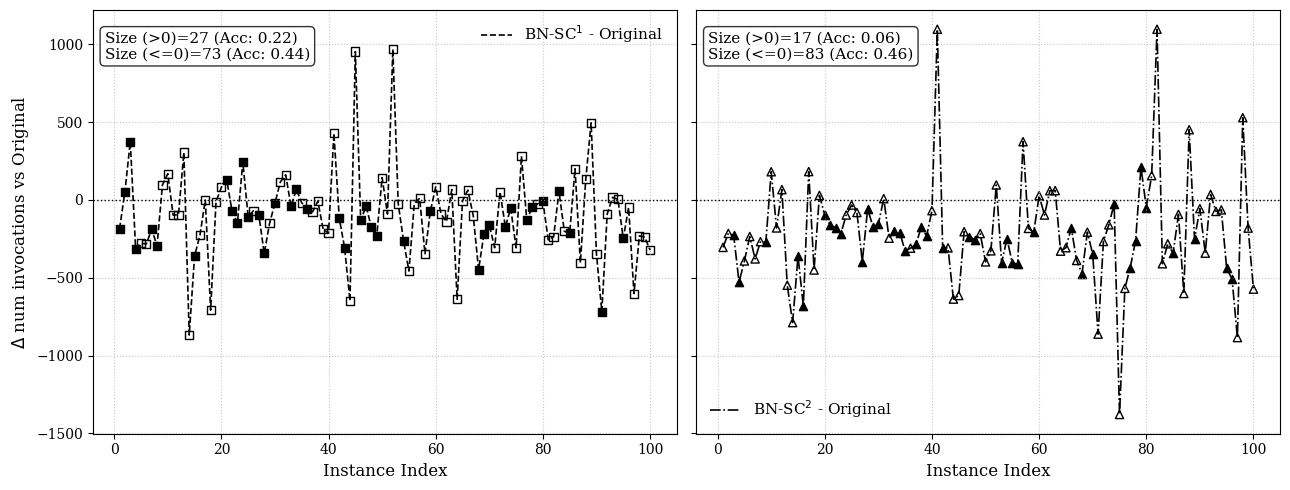

BNE: Size (>0) = 27 (acc: 0.222), Size (<=0) = 73 (acc: 0.438)
BNS: Size (>0) = 17 (acc: 0.059), Size (<=0) = 83 (acc: 0.458)


In [89]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_num_calls_diff(metrics_by_instances1, metrics_by_instances2, metrics_by_instances3=None):
    """
    Plot Δnum_calls vs Original.
    - If only BNE given: single panel.
    - If BNE + BNS given: side-by-side subplots.
    Each point shows correctness (filled = correct, hollow = incorrect).
    Each panel also shows group sizes and accuracies.
    """
    rcParams["font.family"] = "serif"

    n = len(metrics_by_instances1)
    x = list(range(1, n+1))

    # --- Compute diffs & correctness ---
    diff_bne = [m2["num_calls"] - m1["num_calls"] for m1, m2 in zip(metrics_by_instances1, metrics_by_instances2)]
    correct_bne = [m2["correct"] for m2 in metrics_by_instances2]

    if metrics_by_instances3 is not None:
        diff_bns = [m3["num_calls"] - m1["num_calls"] for m1, m3 in zip(metrics_by_instances1, metrics_by_instances3)]
        correct_bns = [m3["correct"] for m3 in metrics_by_instances3]

    # --- Setup axes ---
    if metrics_by_instances3 is not None:
        fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
    else:
        fig, axes = plt.subplots(1, 1, figsize=(7, 5))
        axes = [axes]  # make iterable

    # --- Helper for accuracy summary ---
    def summarize_groups(diffs, corrects):
        group_more = [c for d, c in zip(diffs, corrects) if d > 0]
        group_less_equal = [c for d, c in zip(diffs, corrects) if d <= 0]
        size_more, size_less_equal = len(group_more), len(group_less_equal)
        acc_more = sum(group_more) / size_more if size_more else float("nan")
        acc_less_equal = sum(group_less_equal) / size_less_equal if size_less_equal else float("nan")
        return size_more, acc_more, size_less_equal, acc_less_equal

    # --- Helper for plotting ---
    def plot_one(ax, diffs, corrects, marker, linestyle, label):
        for xi, yi, ci in zip(x, diffs, corrects):
            if ci:
                ax.scatter(xi, yi, marker=marker, facecolors="black", edgecolors="black", s=35)
            else:
                ax.scatter(xi, yi, marker=marker, facecolors="none", edgecolors="black", s=35)
        ax.plot(x, diffs, linestyle=linestyle, color="black", linewidth=1.2, label=label)
        ax.axhline(0, color="black", linewidth=1, linestyle=":")
        ax.set_xlabel("Instance Index", fontsize=12)
        ax.grid(True, linestyle=":", alpha=0.7)
        ax.legend(frameon=False, fontsize=11, )

        # Add summary text box
        size_more, acc_more, size_le, acc_le = summarize_groups(diffs, corrects)
        textstr = f"Size (>0)={size_more} (Acc: {acc_more:.2f})\nSize (<=0)={size_le} (Acc: {acc_le:.2f})"
        ax.text(0.02, 0.95, textstr, transform=ax.transAxes,
                fontsize=11, verticalalignment="top",
                bbox=dict(boxstyle="round", facecolor="white", alpha=0.8, edgecolor="black"))

    # --- Plot panels ---
    plot_one(axes[0], diff_bne, correct_bne, marker="s", linestyle="--", label="BN-SC$^{1}$ - Original")
    if metrics_by_instances3 is not None:
        plot_one(axes[1], diff_bns, correct_bns, marker="^", linestyle="-.", label="BN-SC$^{2}$ - Original")

    # --- Shared ylabel ---
    axes[0].set_ylabel(r"$\Delta$ num invocations vs Original", fontsize=12)

    plt.tight_layout()
    plt.show()


    # ---- Accuracy splits ----
    def accuracy_split(diffs, corrects, name):
        group_more = [c for d, c in zip(diffs, corrects) if d > 0]
        group_less_equal = [c for d, c in zip(diffs, corrects) if d <= 0]

        acc_more = sum(group_more) / len(group_more) if group_more else float('nan')
        acc_less_equal = sum(group_less_equal) / len(group_less_equal) if group_less_equal else float('nan')

        print(f"{name}: Size (>0) = {len(group_more)} (acc: {acc_more:.3f}), Size (<=0) = {len(group_less_equal)} (acc: {acc_less_equal:.3f})")

    accuracy_split(diff_bne, correct_bne, "BNE")
    if metrics_by_instances3 is not None:
        accuracy_split(diff_bns, correct_bns, "BNS")


plot_num_calls_diff(metrics_by_instances1, metrics_by_instances2, metrics_by_instances3=metrics_by_instances3 if root_dir_bns is not None else None)